# Exam INFO284 V21
**Members: Didrik Krog, Jonas Holtan, Gunnar Gjengedal, Snorre Alvsvåg**
## Introduction
### The task
You are supposed to build at least five machine learning models from these data to predict or
classify one relevant target feature for new data points. You can choose target feature yourself, but
sales price is perhaps the most suitable. You may also reduce the number of data points somewhat
by focusing on only specific meaningful parts of the data. Or perhaps you will try dimension
reduction.

### Our Approach
This task can be split into four parts:
- **Part 1** Data Exploration
- **Part 2** Data Cleaning
- **Part 3** Model Building
- **Part 4** Presentation and Analysation

We will explore our data by conducting a *Exploratory Data Analysis*. Here we will look at the data and make note of important features, non important features, and in general inform ourselves with the data. In part 2, we will generally clean the data, remove empty or unique columns and so on. In part 3 we will start to fit the models, we will also change the data in preparation of each model. And at last we will present the results, and analyze the different approaches we took with out models.

We have chosen two supervised machine learning algorythms:
- Algorythm 1
- Algorythm 2

Two unsupervised machine learning algorythms:
- Algorythm 3
- Algotythm 4

and one Deep Learnign algorytm:
- Deep Learning

Moving forward we will start by learing about our data

## Part 1: Data Exploration
As mentioned in the introduction we will be conductin an Exploratory Data Analysis to learn about the data. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("nyc-rolling-sales.csv")
%matplotlib inline 
sns.set(color_codes=True)

Sjekke hvor mye variablene veier

### General
Lets start by looking at the data:

In [2]:
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

From this we can learn the basics, there are 22 features where 10 are integers, and 12 are objects. At first glance were curious about what Unnamed : 0, so we will take a closer look at this in a bit, further Building Class Category is a categorical number with the name attatched, this could be made into an int, with a dictionary explaining what the numbers mean. Its questionable if this directly correlates with Building class, so this will also be investigated. Lets start by looking at Unnamed.

In [5]:
df["Unnamed: 0"].describe()

count    84548.000000
mean     10344.359878
std       7151.779436
min          4.000000
25%       4231.000000
50%       8942.000000
75%      15987.250000
max      26739.000000
Name: Unnamed: 0, dtype: float64

In [6]:
df["Unnamed: 0"].value_counts()

2049     5
478      5
350      5
2399     5
4508     5
        ..
25332    1
25591    1
24422    1
26028    1
25278    1
Name: Unnamed: 0, Length: 26736, dtype: int64

It is not Uniqe, but it seems to not give anything of value to an algorythm, There are 26736 different options and rows share their value with at most 5 others.

Now to look at our building class Category:

In [7]:
df["BUILDING CLASS CATEGORY"].describe()

count                                           84548
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: BUILDING CLASS CATEGORY, dtype: object

In [8]:
df["BUILDING CLASS AT PRESENT"].describe()

count     84548
unique      167
top          D4
freq      12663
Name: BUILDING CLASS AT PRESENT, dtype: object

**These are not the same.**

We move on to look at NULL values both in the set itself and in the induvidual columns:

In [9]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [10]:
print("Percentage null or na values in Dataset")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in Dataset


Unnamed: 0                        0.0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

As it stands none of our two functions gives us any warnings, everything is there, and there are no null values. As it is its not wrong or correct, there are empty values in our dataset, but they are represented differently as shown under:

In [11]:
i = 0
for col in df.columns.tolist():
    print(f'---------------------------\n{col}')
    print(df[col].value_counts())

---------------------------
Unnamed: 0
2049     5
478      5
350      5
2399     5
4508     5
        ..
25332    1
25591    1
24422    1
26028    1
25278    1
Name: Unnamed: 0, Length: 26736, dtype: int64
---------------------------
BOROUGH
4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64
---------------------------
NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
EAST RIVER                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
PELHAM BAY                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64
---------------------------
BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - 

Knowing this one can be forgiven to assume that the dataset uses "-" and " " for empty values, lets run the same function as before but using these as values rather than standard .isna() and .isnull()

Here we can see that 14561 are not numeric, these are the " - ", or in our case, NULL values. We can change them:

In [12]:
for col in df.columns.tolist():
    df.loc[df[col] == "", col] = None

print("Percentage null or na values in Dataset")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in Dataset


Unnamed: 0                        0.0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [46]:
test_df = df.replace(' ', np.nan)
test_df = test_df.replace(' -  ', np.nan)

In [47]:
test_df["SALE PRICE"].value_counts()

0           10228
10            766
450000        427
550000        416
650000        414
            ...  
351296          1
5390000         1
79717           1
38900000        1
270001          1
Name: SALE PRICE, Length: 10007, dtype: int64

In [48]:
test_df = test_df.replace('0', np.nan)

In [53]:
test_df["SALE PRICE"].value_counts()

10          766
450000      427
550000      416
650000      414
600000      409
           ... 
351296        1
5390000       1
79717         1
38900000      1
736661        1
Name: SALE PRICE, Length: 10006, dtype: int64

In [50]:
test_df.dropna()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [51]:
print("Percentage null or na values in Dataset\n-------------------------------------")
((test_df.isnull() | test_df.isna()).sum() * 100 / test_df.index.size).round(2)

Percentage null or na values in Dataset
-------------------------------------


Unnamed: 0                          0.00
BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                   43.26
GROSS SQUARE FEET                  46.16
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                         29.32
SALE DATE                           0.00
dtype: float64

In [15]:
la = df["SALE PRICE"].str.isnumeric()

In [18]:
la.value_counts()

True     69987
False    14561
Name: SALE PRICE, dtype: int64

Unnamed, Useless

BOROUGH, BLOCK, LOT, Adress, Apartment number & Zipcode: Either too generalized or too speciif or supersided by Neighborhood

Easement: Useless

BUILDING CLASS AT PRESENT, TAX CLASS AT PRESENT: Supercededed by their "time of sale" Counterpart.

Total Units: Represented within Residental and Commercial Units



Housing price is distributed

Correlation



/Users/snorrealvsvag/Documents/machine_learning/machine-learning_284/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


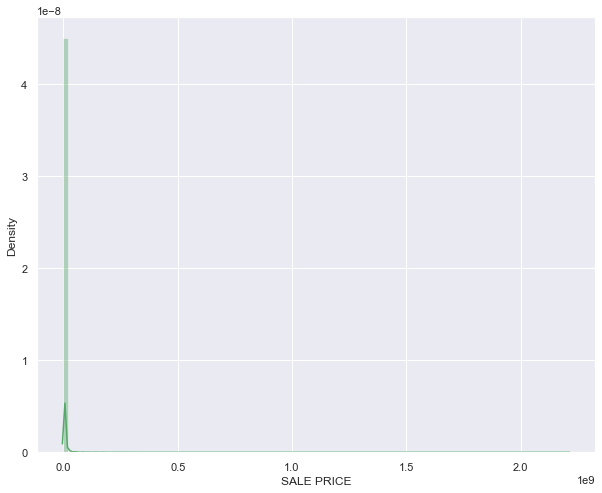

In [52]:
plt.figure(figsize=(10, 8))
#sns.distplot(test_df['SALE PRICE'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.plot(x, y)

In [ ]:
plt.figure(figsize=(10, 8))
#sns.distplot(test_df['SALE PRICE'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.plot(x, y)

In [ ]:
plt.figure(figsize=(10, 8))
#sns.distplot(test_df['SALE PRICE'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.plot(x, y)